# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [1]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 850 kB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 54.2 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 59.2 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 7.0 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 70.8 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 60.1 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 65.5 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 67.1 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 60.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 71.2 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 63.7 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 10.6 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 72.2 MB/s eta 0:00:01
     |██████████████████

## Imports

In [3]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader # ADDED

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [4]:
# Define transforms
## YOUR CODE HERE ##
transforms = transforms.ToTensor()

# Create training set and define training dataloader
## YOUR CODE HERE ##
train_data = torchvision.datasets.MNIST(root="data", train=True, download=True, transform=transforms)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

# Create test set and define test dataloader
## YOUR CODE HERE ##
test_data = torchvision.datasets.MNIST(root="data", train=False, download=True, transform=transforms)
test_loader = DataLoader(test_data, batch_size=100)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [23]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T, cmap='plasma')
        plt.show()

In [13]:
print("Number of MNIST train data instances: {}".format(len(train_data)))
print("Number of MNIST test data instances: {}".format(len(test_data)))

Number of MNIST train data instances: 60000
Number of MNIST test data instances: 10000


In [14]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

print("number of images: {}".format(images.shape))
print("number of labels: {}".format(labels.shape))

number of images: torch.Size([100, 1, 28, 28])
number of labels: torch.Size([100])


3


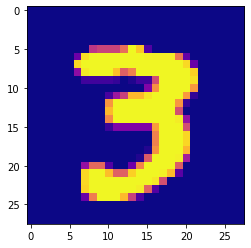

8


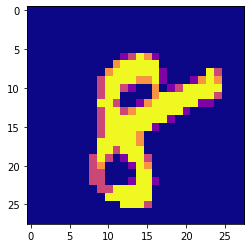

6


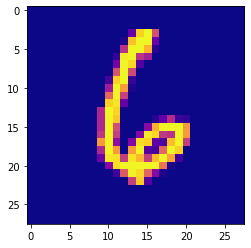

1


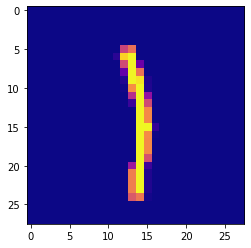

5


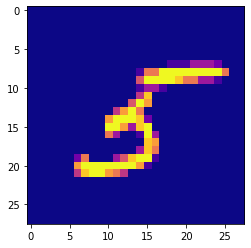

In [24]:
# Explore data
## YOUR CODE HERE ##
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [25]:
## YOUR CODE HERE ##
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.activation = F.relu
        self.layer1 = nn.Linear(28 * 28, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.layer3(x)
        return x
    
net = Net()

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [26]:
## YOUR CODE HERE ##
# Choose an optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Choose a loss function
criterion = nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [27]:
## YOUR CODE HERE ##
num_epochs = 10

# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Zero out the gradients of the optimizer
        optimizer.zero_grad()

        # Get the outputs of your model and compute your loss
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        
        # Compute the loss gradient using the backward method and have the optimizer take a step
        loss.backward()
        optimizer.step()

        # Compute the accuracy and print the accuracy and loss
        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))

    # The validation step is done for you.
    val_loss = 0.0
    val_correct = 0
    net.eval()
    for inputs, labels in test_loader:

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).sum().item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(test_loader):.2f}% validation loss: {val_loss/len(test_loader):.5f}')
    val_loss_history.append(val_loss/len(test_loader))

Epoch 1 training accuracy: 88.79% training loss: 0.40215
Epoch 1 validation accuracy: 94.42% validation loss: 0.20189
Epoch 2 training accuracy: 95.04% training loss: 0.16915
Epoch 2 validation accuracy: 95.80% validation loss: 0.14173
Epoch 3 training accuracy: 96.53% training loss: 0.11647
Epoch 3 validation accuracy: 96.64% validation loss: 0.10693
Epoch 4 training accuracy: 97.34% training loss: 0.08744
Epoch 4 validation accuracy: 97.31% validation loss: 0.09430
Epoch 5 training accuracy: 97.92% training loss: 0.06802
Epoch 5 validation accuracy: 97.34% validation loss: 0.08532
Epoch 6 training accuracy: 98.35% training loss: 0.05370
Epoch 6 validation accuracy: 97.24% validation loss: 0.08561
Epoch 7 training accuracy: 98.60% training loss: 0.04496
Epoch 7 validation accuracy: 97.57% validation loss: 0.07874
Epoch 8 training accuracy: 98.85% training loss: 0.03704
Epoch 8 validation accuracy: 97.82% validation loss: 0.07596
Epoch 9 training accuracy: 99.00% training loss: 0.03129

Plot the training loss (and validation loss/accuracy, if recorded).

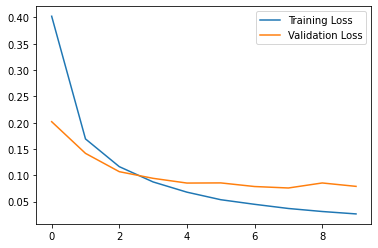

In [28]:
## YOUR CODE HERE ##
# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [29]:
## YOUR CODE HERE ##
def test():
    net.eval()
    test_loss = 0
    test_correct = 0
    for i, data in enumerate(test_loader):
        inputs, labels  = data
            
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        _, preds = torch.max(outputs.data, 1)
        test_correct += (preds == labels).sum().item()
        test_loss += loss.item()
    print(f'Epoch {epoch + 1} test accuracy: {test_correct/len(test_loader):.2f}% test loss: {test_loss/len(test_loader):.5f}')

In [30]:
for epoch in range(num_epochs):
    test()

Epoch 1 test accuracy: 97.11% test loss: 0.09510
Epoch 2 test accuracy: 98.48% test loss: 0.04556
Epoch 3 test accuracy: 99.37% test loss: 0.02370
Epoch 4 test accuracy: 99.80% test loss: 0.01123
Epoch 5 test accuracy: 99.93% test loss: 0.00635
Epoch 6 test accuracy: 99.99% test loss: 0.00423
Epoch 7 test accuracy: 100.00% test loss: 0.00308
Epoch 8 test accuracy: 100.00% test loss: 0.00244
Epoch 9 test accuracy: 100.00% test loss: 0.00205
Epoch 10 test accuracy: 100.00% test loss: 0.00175


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [31]:
## YOUR CODE HERE ##
# Add dropout = 0.2

class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.activation = F.relu
        self.layer1 = nn.Linear(28 * 28, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 10)
        
        self.dropout=nn.Dropout(0.2)
        
    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.layer3(x)
        return x
    
net2 = Net2()

In [32]:
# Choose an optimizer
optimizer = optim.Adam(net2.parameters(), lr=0.001)

# Choose a loss function
criterion = nn.CrossEntropyLoss()

In [33]:
num_epochs = 10

# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    net2.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Zero out the gradients of the optimizer
        optimizer.zero_grad()

        # Get the outputs of your model and compute your loss
        outputs = net2(inputs)
        loss = criterion(outputs, labels)
        
        # Compute the loss gradient using the backward method and have the optimizer take a step
        loss.backward()
        optimizer.step()

        # Compute the accuracy and print the accuracy and loss
        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))

    # The validation step is done for you.
    val_loss = 0.0
    val_correct = 0
    net2.eval()
    for inputs, labels in test_loader:

        outputs = net2(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).sum().item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(test_loader):.2f}% validation loss: {val_loss/len(test_loader):.5f}')
    val_loss_history.append(val_loss/len(test_loader))

Epoch 1 training accuracy: 89.01% training loss: 0.38508
Epoch 1 validation accuracy: 94.46% validation loss: 0.18774
Epoch 2 training accuracy: 95.38% training loss: 0.15721
Epoch 2 validation accuracy: 96.17% validation loss: 0.12792
Epoch 3 training accuracy: 96.77% training loss: 0.10890
Epoch 3 validation accuracy: 96.00% validation loss: 0.12469
Epoch 4 training accuracy: 97.52% training loss: 0.08099
Epoch 4 validation accuracy: 97.20% validation loss: 0.09066
Epoch 5 training accuracy: 98.03% training loss: 0.06320
Epoch 5 validation accuracy: 97.18% validation loss: 0.09385
Epoch 6 training accuracy: 98.44% training loss: 0.05136
Epoch 6 validation accuracy: 97.39% validation loss: 0.08252
Epoch 7 training accuracy: 98.74% training loss: 0.04119
Epoch 7 validation accuracy: 97.52% validation loss: 0.07767
Epoch 8 training accuracy: 98.95% training loss: 0.03455
Epoch 8 validation accuracy: 97.82% validation loss: 0.07636
Epoch 9 training accuracy: 99.06% training loss: 0.02968

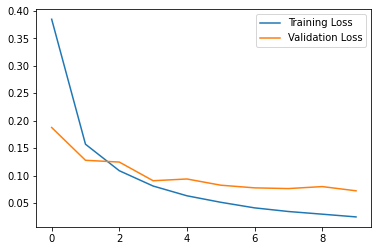

In [34]:
# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

In [37]:
def test2():
    net2.eval()
    test_loss = 0
    test_correct = 0
    for i, data in enumerate(test_loader):
        inputs, labels  = data
            
        optimizer.zero_grad()
        
        outputs = net2(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        _, preds = torch.max(outputs.data, 1)
        test_correct += (preds == labels).sum().item()
        test_loss += loss.item()
    print(f'Epoch {epoch + 1} test accuracy: {test_correct/len(test_loader):.2f}% test loss: {test_loss/len(test_loader):.5f}')

In [38]:
for epoch in range(num_epochs):
    test2()

Epoch 1 test accuracy: 96.97% test loss: 0.10386
Epoch 2 test accuracy: 98.48% test loss: 0.04678
Epoch 3 test accuracy: 99.46% test loss: 0.02024
Epoch 4 test accuracy: 99.84% test loss: 0.00982
Epoch 5 test accuracy: 99.97% test loss: 0.00594
Epoch 6 test accuracy: 99.98% test loss: 0.00409
Epoch 7 test accuracy: 100.00% test loss: 0.00301
Epoch 8 test accuracy: 100.00% test loss: 0.00232
Epoch 9 test accuracy: 100.00% test loss: 0.00192
Epoch 10 test accuracy: 100.00% test loss: 0.00164


## Saving your model
Using `torch.save`, save your model for future loading.

In [39]:
## YOUR CODE HERE ##
torch.save(Net, "Net.pth")
torch.save(Net2, "Net2.pth")

# Finished